In [91]:
import pandas as pd
from pydna.dseqrecord import Dseqrecord
import os

# to show assemblies
from pydna.assembly import Assembly

# Show pictures
import IPython.core.display

# For making the genetic construct figure 
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

Sometimes the dependencies doesen't work at first but by running the cell above twice, it is possible to run the notebook. 

# 02_1_DESIGN_Combinatorial_library

This document is based on a notebook from the teemi documentation, see it below:

<a target="_blank" href="https://colab.research.google.com/github/hiyama341/teemi/blob/main/colab_notebooks/02_1_DESIGN_Combinatorial_library.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## 1.1 Data aquisition and processing
To build a combinatorial library from the generated promoters and homologs some of them need to be reversed. Namely, the upstream part from bidirectional promoter which we can easily do with a simple Python trick (see below). 

In [92]:
from teemi.design.fetch_sequences import read_genbank_files

In [93]:
path = 'data/Export/Synthetic biology project/'
CYP_CDSs = []
for file in os.listdir(path+'CDSs/CYP450/'):
    if file.endswith('.gb'):
        CYP_CDSs = CYP_CDSs + read_genbank_files(path+'CDSs/cyp450/'+file)
print(CYP_CDSs)
CYP_CDSs_rv = []
for file in os.listdir(path+'CDSs/CYP450/'):
    if file.endswith('.gb'):
        CYP_CDSs_rv = CYP_CDSs_rv + read_genbank_files(path+'CDSs/cyp450/'+file)
print(CYP_CDSs_rv)

Lac_CDSs = []
for file in os.listdir(path+'CDSs/Laccase/'):
    if file.endswith('.gb'):
        Lac_CDSs = Lac_CDSs + read_genbank_files(path+'CDSs/Laccase/'+file)
print(Lac_CDSs)
Lac_CDSs_rv = []
for file in os.listdir(path+'CDSs/Laccase/'):
    if file.endswith('.gb'):
        Lac_CDSs_rv = Lac_CDSs_rv + read_genbank_files(path+'CDSs/Laccase/'+file)
print(Lac_CDSs_rv)

MnO_CDSs = []
for file in os.listdir(path+'CDSs/MnPeroxidase/'):
    if file.endswith('.gb'):
        MnO_CDSs = MnO_CDSs + read_genbank_files(path+'CDSs/MnPeroxidase/'+file)
print(MnO_CDSs)
MnO_CDSs_rv = []
for file in os.listdir(path+'CDSs/MnPeroxidase/'):
    if file.endswith('.gb'):
        MnO_CDSs_rv = MnO_CDSs_rv + read_genbank_files(path+'CDSs/MnPeroxidase/'+file)
print(MnO_CDSs_rv)

LiO_CDSs = []
for file in os.listdir(path+'CDSs/LigninPeroxidase/'):
    if file.endswith('.gb'):
        LiO_CDSs = LiO_CDSs + read_genbank_files(path+'CDSs/LigninPeroxidase/'+file)
print(LiO_CDSs)
LiO_CDSs_rv = []
for file in os.listdir(path+'CDSs/LigninPeroxidase/'):
    if file.endswith('.gb'):
        LiO_CDSs_rv = LiO_CDSs_rv + read_genbank_files(path+'CDSs/LigninPeroxidase/'+file)
print(LiO_CDSs_rv)

ph4h3 = []
for file in os.listdir(path+'Promoters/Bidirectional'):
    if file.endswith('.gb'):
        ph4h3 = ph4h3 + read_genbank_files(path+'Promoters/Bidirectional/'+file)
print(ph4h3)
ph4h3_rv = []
for file in os.listdir(path+'Promoters/Bidirectional'):
    if file.endswith('.gb'):
        ph4h3_rv = ph4h3_rv + read_genbank_files(path+'Promoters/Bidirectional/'+file)
print(ph4h3_rv)

reporter_CDSs = []
for file in os.listdir(path+'reporters'):
    if file.endswith('.gb'):
        reporter_CDSs = reporter_CDSs + read_genbank_files(path+'reporters/'+file)
print(reporter_CDSs)
reporter_CDSs_rv = []
for file in os.listdir(path+'reporters'):
    if file.endswith('.gb'):
        reporter_CDSs_rv = reporter_CDSs_rv + read_genbank_files(path+'reporters/'+file)
print(reporter_CDSs_rv)


[SeqRecord(seq=Seq('ACCAACATGGCTCTGCCGCTTTCTATGGCTGCAGCTGCTCTACTCATTATATGC...TGA'), id='Cyp450-PC-PAH_1', name='Cyp450-PC-PAH_1', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGTCTCGTTTTCTTTACGACTACTCGACGCTCCTGTATCTCTGTGCCGGCATC...TGA'), id='Cyp450s-PC-PAH_3', name='Cyp450s-PC-PAH_3', description='', dbxrefs=[])]
[SeqRecord(seq=Seq('ACCAACATGGCTCTGCCGCTTTCTATGGCTGCAGCTGCTCTACTCATTATATGC...TGA'), id='Cyp450-PC-PAH_1', name='Cyp450-PC-PAH_1', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGTCTCGTTTTCTTTACGACTACTCGACGCTCCTGTATCTCTGTGCCGGCATC...TGA'), id='Cyp450s-PC-PAH_3', name='Cyp450s-PC-PAH_3', description='', dbxrefs=[])]
[SeqRecord(seq=Seq('ATGTCGAGGTTTCACTCTCTTTTCGCTTTCGTCGTTGCTTCCCTTACGGCTGTG...TAA'), id='AF414109', name='AF414109', description='', dbxrefs=[]), SeqRecord(seq=Seq('ATGTCGAGGTTTCACTCTCTTCTCGCTTTCGTCGTTGCTTCCCTTGCGGCTGTG...TAA'), id='Laccase_Trametes_versic', name='Laccase_Trametes_versic', description='', dbxrefs=[])]
[SeqRecord(seq=Seq('ATGTCGAGGTTTCACTCTCTTTT

In [94]:
# we have to reverse the sequences here bc we want to have bi-directional promoters
for seq in CYP_CDSs_rv:
    seq.seq = seq.seq[::-1]

for seq in Lac_CDSs_rv: 
    seq.seq = seq.seq[::-1]

for seq in MnO_CDSs_rv: 
    seq.seq = seq.seq[::-1]

for seq in LiO_CDSs_rv: 
    seq.seq = seq.seq[::-1]

for seq in ph4h3_rv: 
    seq.seq = seq.seq[::-1]

for seq in reporter_CDSs_rv: 
    seq.seq = seq.seq[::-1]

In [95]:
# Also a list of all genes is made, both reverse and forward

allgenes_CDSs = CYP_CDSs + Lac_CDSs + MnO_CDSs + LiO_CDSs
allgenes_CDSs_rv = CYP_CDSs_rv + Lac_CDSs_rv + MnO_CDSs_rv + LiO_CDSs_rv

In [96]:
print(len(CYP_CDSs))
print(len(Lac_CDSs))
print(len(MnO_CDSs))
print(len(LiO_CDSs))

2
2
2
1


Now lets fetch the up/down sites of IS1 and IS2 and the TrpC terminators. 

In [102]:
ISs_arms = []
for file in os.listdir(path+'ISs/Homology arms/'):
    if file.endswith('.gb'):
        ISs_arms = ISs_arms + read_genbank_files(path+'ISs/Homology arms/'+file)

Now, the sequences needs to be made into Dseqrecord elements to make it into a DesignAssembly class. The names for these objects also need to be retrieved. 

In [103]:
#Getting the objects names
ISs_arms_names = [names.name for names in ISs_arms]
CYP_templates_names = [names.name for names in CYP_CDSs]
Lac_templates_names = [names.name for names in Lac_CDSs]
MnO_templates_names = [names.name for names in MnO_CDSs]
LiO_templates_names = [names.name for names in LiO_CDSs]
ph4h3_templates_names = [names.name for names in ph4h3]
reporter_template_names = [names.name for names in reporter_CDSs]
allgenes_template_names = [names.name for names in all_genes_CDSs]

CYP_rv_templates_names = [names.name for names in CYP_CDSs_rv]
Lac_rv_templates_names = [names.name for names in Lac_CDSs_rv]
MnO_rv_templates_names = [names.name for names in MnO_CDSs_rv]
LiO_rv_templates_names = [names.name for names in LiO_CDSs_rv]
ph4h3_rv_templates_names = [names.name for names in ph4h3_rv]
reporter_rv_template_names = [names.name for names in reporter_CDSs_rv]
allgenes_rv_template_names = [names.name for names in allgenes_CDSs_rv]

# Getting their sequences
ISs_arms_seqrecord = [Dseqrecord(seq) for seq in ISs_arms]
CYP_templates_seqrecord = [Dseqrecord(seq) for seq in CYP_CDSs]
Lac_templates_seqrecord = [Dseqrecord(seq) for seq in Lac_CDSs]
MnO_templates_seqrecord = [Dseqrecord(seq) for seq in MnO_CDSs]
LiO_templates_seqrecord = [Dseqrecord(seq) for seq in LiO_CDSs]
ph4h3_templates_seqrecord = [Dseqrecord(seq) for seq in ph4h3]
reporter_templates_seqrecord = [Dseqrecord(seq) for seq in reporter_CDSs_rv]
allgenes_templates_seqrecord = [Dseqrecord(seq) for seq in allgenes_CDSs_rv]

CYP_rv_templates_seqrecord = [Dseqrecord(seq) for seq in CYP_CDSs_rv]
Lac_rv_templates_seqrecord = [Dseqrecord(seq) for seq in Lac_CDSs_rv]
MnO_rv_templates_seqrecord = [Dseqrecord(seq) for seq in MnO_CDSs_rv]
LiO_rv_templates_seqrecord = [Dseqrecord(seq) for seq in LiO_CDSs_rv]
ph4h3_rv_templates_seqrecord = [Dseqrecord(seq) for seq in ph4h3_rv]
reporter_rv_templates_seqrecord = [Dseqrecord(seq) for seq in reporter_CDSs_rv]
allgenes_rv_templates_seqrecord = [Dseqrecord(seq) for seq in allgenes_CDSs_rv]

### Making a figure of the genetic construct

In [104]:
dtured = '#C4000D'
blue = '#1F3DFF'
brightgreen = '#4FFF57'
green = '#00C700'
purple = '#540AFF'
orange = '#FF5924'
red = '#FF2459'
navyblue = '#000066'
yellow = '#F2D42E'

prv1 = {'name':'Prv', 'start':-1, 'end':-10, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
allgenesrv1 = {'name':'All genes', 'start':-21, 'end':-40, 'type':'CDS', 'opts':{'label': 'GOI', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':brightgreen}} 
TtrpC_rv1 = {'name':'T_trpC', 'start':-41, 'end':-55, 'type':'Terminator'}
IS1A = {'name':'IS1_A', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS1 A',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

pfw1 = {'name':'Pfw', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
allgenesfw1 = {'name':'All genes', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'GOI & mRFP', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':dtured}} 
TtrpC_fw1 = {'name':'T_trpC', 'start':96, 'end':110, 'type':'Terminator'}
IS1B = {'name':'IS1_B', 'start':-10, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS1 B',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}


prv2 = {'name':'Prv', 'start':-1, 'end':-10, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
allgenesrv2 = {'name':'All genes', 'start':-21, 'end':-40, 'type':'CDS', 'opts':{'label': 'GOI', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': 0, 'label_style':'italic', 'color':green}} 
TtrpC_rv2 = {'name':'T_trpC', 'start':-41, 'end':-55, 'type':'Terminator'}
IS2A = {'name':'IS2_A', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS2 A',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

pfw2 = {'name':'Pfw', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.00,0.00,0.00]}}
allgenesfw2 = {'name':'All genes', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'GOI & mCitrine', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':yellow}} 
TtrpC_fw2 = {'name':'T_trpC', 'start':96, 'end':110, 'type':'Terminator'}
IS2B = {'name':'IS2_B', 'start':-41, 'end':-55, 'type':'Scar', 'opts':{'label': 'IS2 B',  'label_y_offset': 3, 'label_x_offset': 0,  'color':[0.60,0.60,0.60]}}

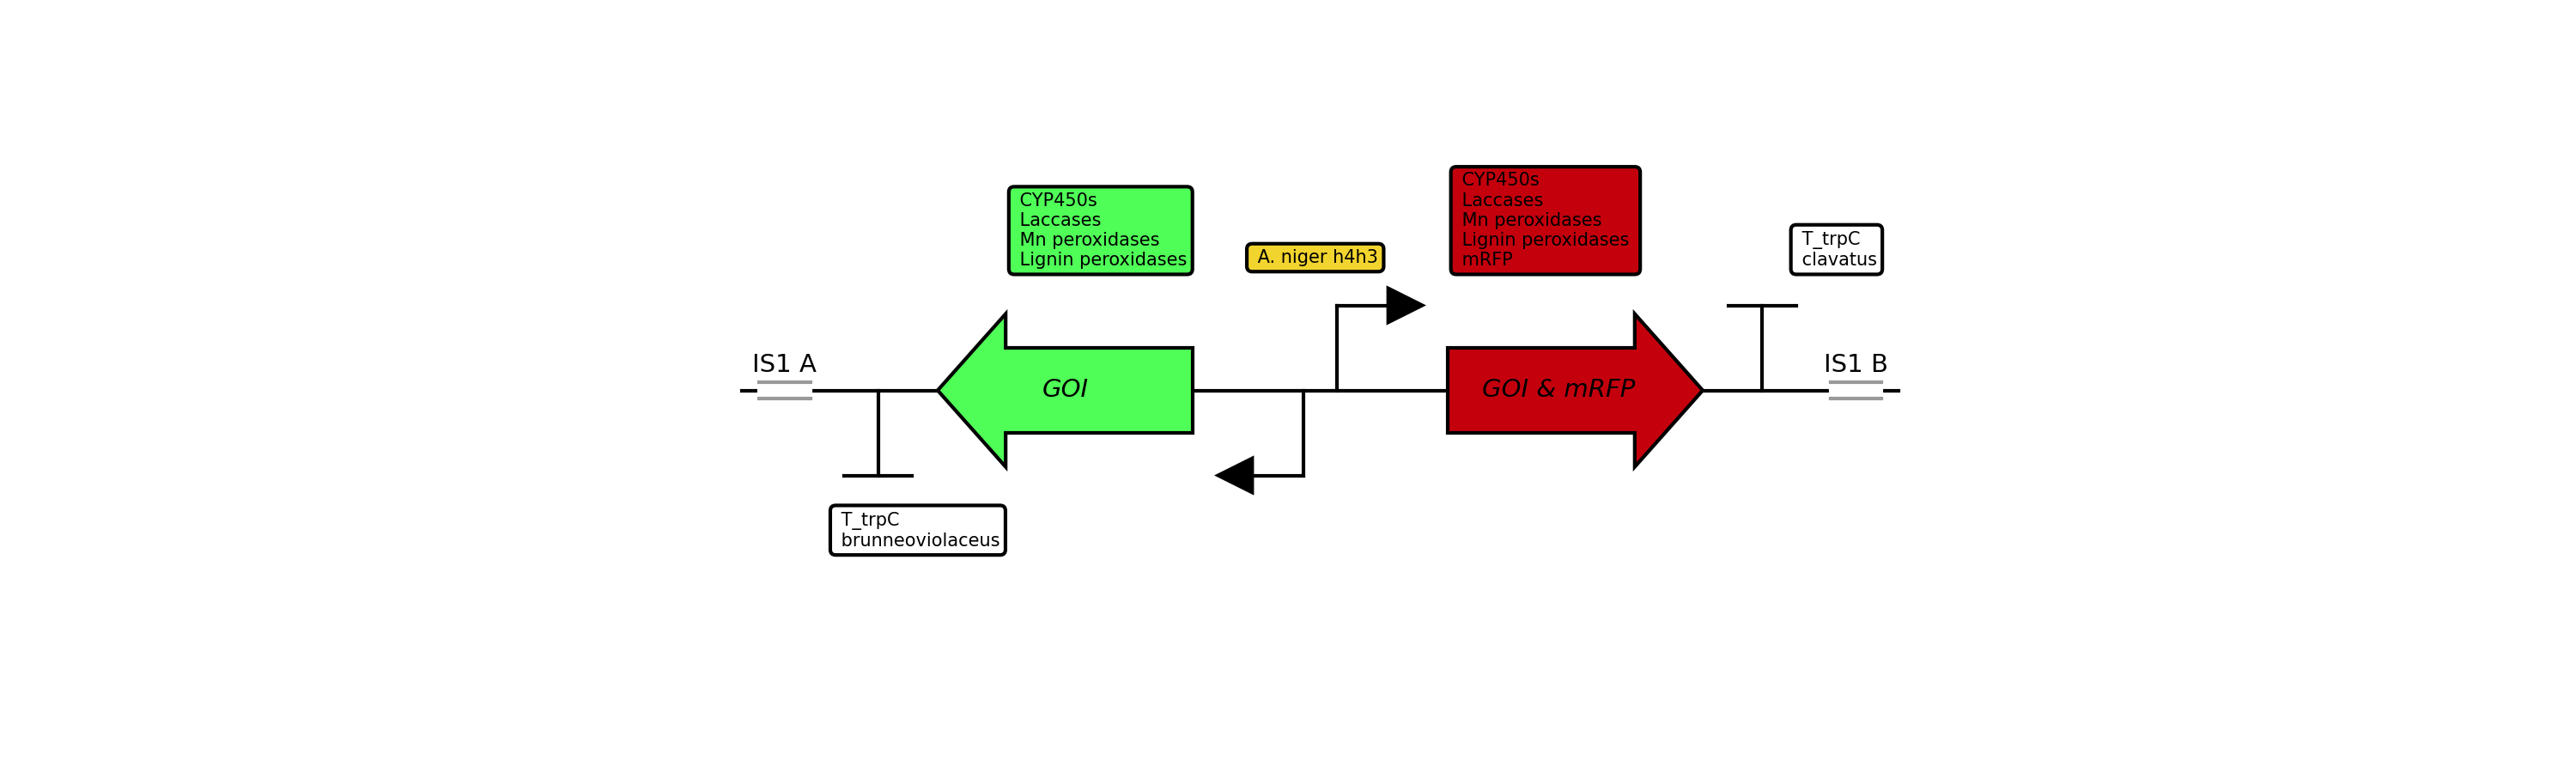

In [105]:
plt.figure(figsize=(10, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot G8H construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[IS1A, TtrpC_rv1, allgenesrv1, prv1, pfw1,  allgenesfw1, TtrpC_fw1, IS1B]])

#### Plot text
# terminators
plt.text(11,-18, ' T_trpC \n brunneoviolaceus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))
plt.text(124,15, ' T_trpC \n clavatus', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoters
plt.text(60, 15, ' A. niger h4h3', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))


# homologs
plt.text(32,15, ' CYP450s \n Laccases \n Mn peroxidases \n Lignin peroxidases', ha='left', rotation=0, wrap=True,  size = 5, 
        # adds box
        bbox=dict(boxstyle="round",facecolor=brightgreen))

plt.text(84,15, ' CYP450s \n Laccases \n Mn peroxidases \n Lignin peroxidases \n mRFP', ha='left', rotation=0, wrap=True,  size = 5, 
        # adds box
        bbox=dict(boxstyle="round",facecolor=dtured))

name = 'IS1'

plt.savefig('data/plots/'+name+'.png',format = 'png',  dpi = 300)
plt.savefig('data/plots/'+name+'.pdf',format = 'pdf',  dpi = 300)

IPython.core.display.Image('data/plots/IS1.png', width=2000)

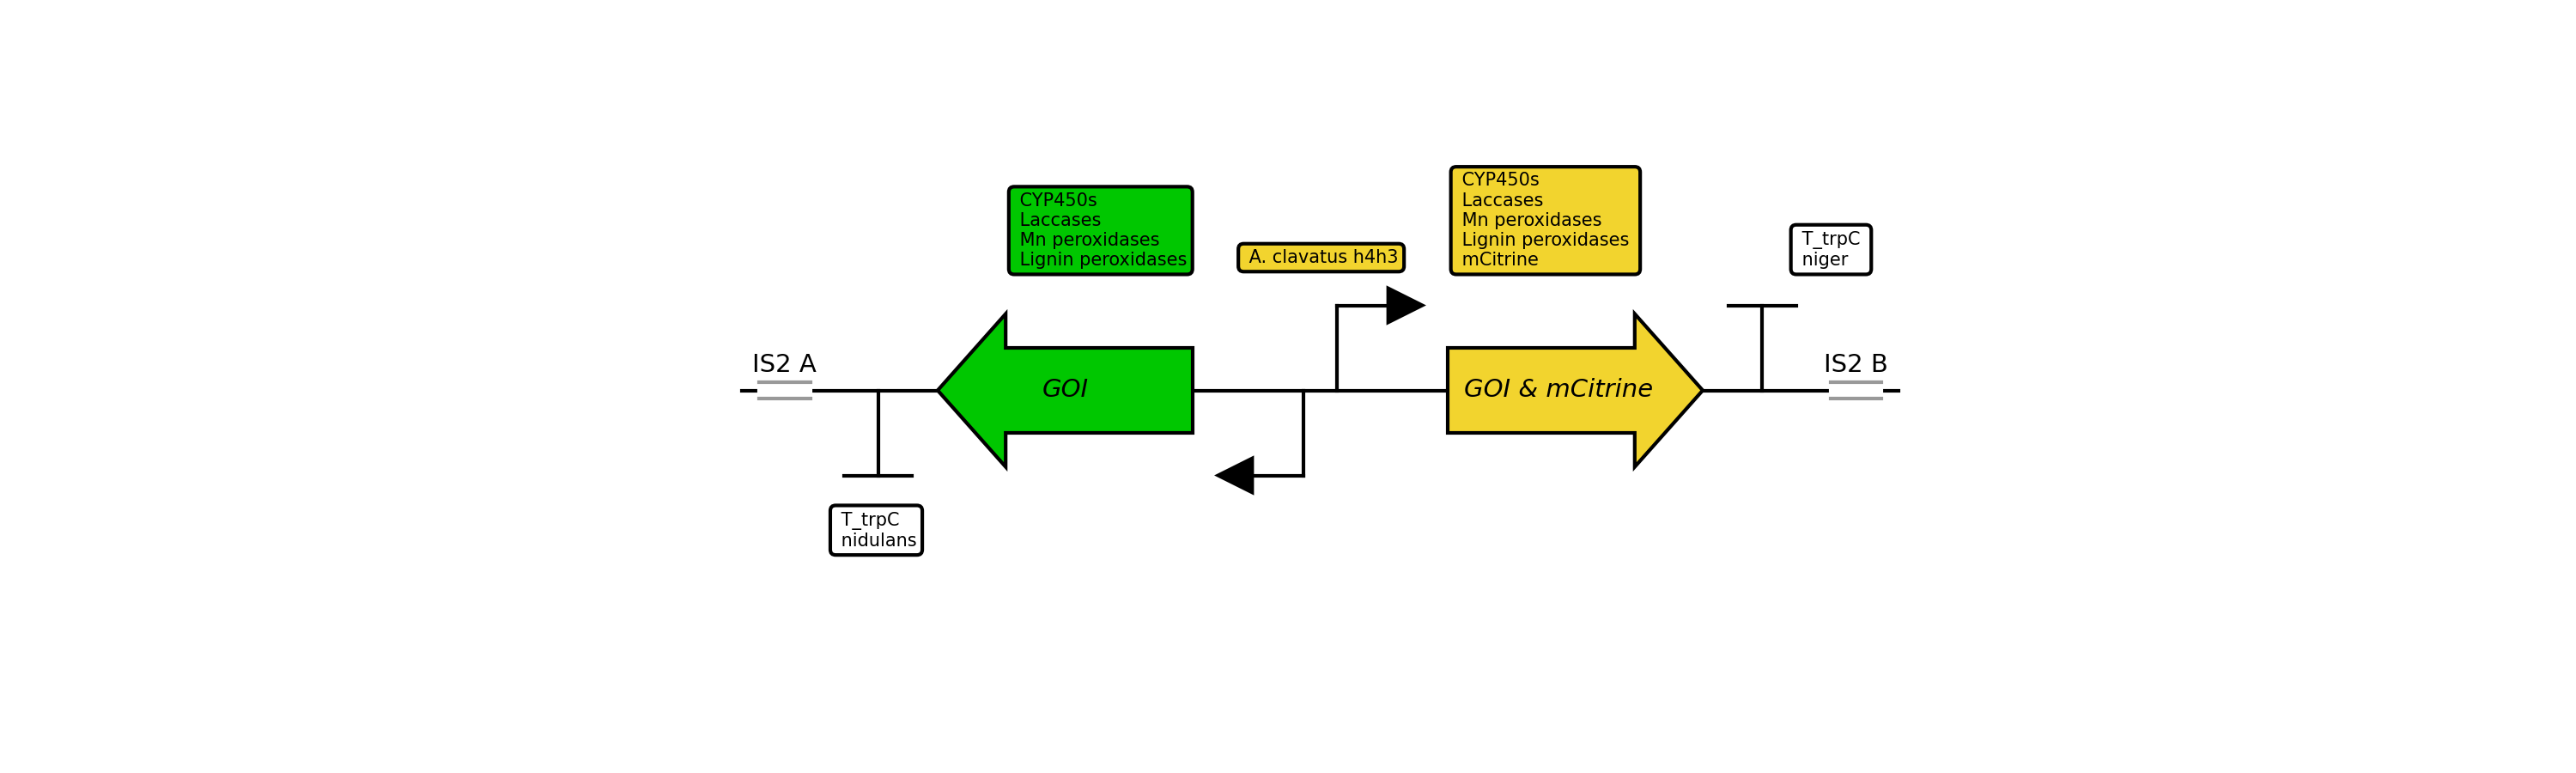

In [106]:
plt.figure(figsize=(10, 3),dpi=300)
gs = gridspec.GridSpec(1, 1)

# Plot G8H construct
ax = plt.subplot(gs[0])
dnaplotlib.plot_sbol_designs([ax], [[IS2A, TtrpC_rv2, allgenesrv2, prv2, pfw2,  allgenesfw2, TtrpC_fw2, IS2B]])

#### Plot text
# terminators
plt.text(11,-18, ' T_trpC \n nidulans', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))
plt.text(124,15, ' T_trpC \n niger', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor='white'))

# promoters
plt.text(59, 15, ' A. clavatus h4h3', ha='left', rotation=0, wrap=True,  size = 5,
         # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))


# homologs
plt.text(32,15, ' CYP450s \n Laccases \n Mn peroxidases \n Lignin peroxidases', ha='left', rotation=0, wrap=True,  size = 5, 
        # adds box
        bbox=dict(boxstyle="round",facecolor=green))

plt.text(84,15, ' CYP450s \n Laccases \n Mn peroxidases \n Lignin peroxidases \n mCitrine', ha='left', rotation=0, wrap=True,  size = 5, 
        # adds box
        bbox=dict(boxstyle="round",facecolor=yellow))

name = 'IS2'

plt.savefig('data/plots/'+name+'.png',format = 'png',  dpi = 300)
plt.savefig('data/plots/'+name+'.pdf',format = 'pdf',  dpi = 300)

IPython.core.display.Image('data/plots/IS2.png', width=2000)

# 2. Generating the combinatorial library 

### Initiating the DesignAssembly class:

Before we initiate the designAssembly object we can define and add a piece of DNA that can be used for easier genotyping and contain a crRNA so we can delete the genetic module if we need to. Below, a pad consisting of a ATF1 CRISPR Guide RNA flanked by arbitrary sequences is inititalized as a pad.

In our case, we don't need a pad, so it will be left empty

In [107]:
pad = [Dseqrecord('')]
pad[0].seq

Dseq(-0)


We simply initiate the class by calling it with the list of sequences, their names, the pad, and the position of the pad. 
This normally takes a long time for this design apparently.

In [108]:
from teemi.design.combinatorial_design import DesignAssembly

In [109]:

# We wil lmake one assembly for each integration site

# list_of_seqs = [[ISs_arms_seqrecord[0]], [reporter_rv_templates_seqrecord[0]] + allgenes_rv_templates_seqrecord, ph4h3_templates_seqrecord + ph4h3_rv_templates_seqrecord, [reporter_templates_seqrecord[1]] + allgenes_templates_seqrecord, [ISs_arms_seqrecord[1]], 
#                 [ISs_arms_seqrecord[2]], [reporter_rv_templates_seqrecord[2]] + allgenes_rv_templates_seqrecord, ph4h3_templates_seqrecord + ph4h3_rv_templates_seqrecord, [reporter_templates_seqrecord[3]] + allgenes_templates_seqrecord, [ISs_arms_seqrecord[3]]]
list_of_seqs_IS1 = [[ISs_arms_seqrecord[0]], allgenes_rv_templates_seqrecord, [ph4h3_templates_seqrecord[0]], [reporter_templates_seqrecord[1]] + allgenes_templates_seqrecord, [ISs_arms_seqrecord[1]]]
list_of_seqs_IS2 = [[ISs_arms_seqrecord[2]], allgenes_rv_templates_seqrecord, [ph4h3_templates_seqrecord[1]], [reporter_templates_seqrecord[2]] + allgenes_templates_seqrecord, [ISs_arms_seqrecord[3]]]

assembly_IS1 = DesignAssembly(list_of_seqs_IS1,    
                                list_of_pads= pad,  # The sequence you want to incorporate into the primers. 
                                positions_of_pads =  [0],  # Position of the pad in the sequence
                                target_tm=55,          # Target TM
                                limit=13,              # Minimum length of the primers
                                overlap=50)            # Overlap between primers

assembly_IS2 = DesignAssembly(list_of_seqs_IS2,    
                                list_of_pads= pad,  # The sequence you want to incorporate into the primers. 
                                positions_of_pads =  [0],  # Position of the pad in the sequence
                                target_tm=55,          # Target TM
                                limit=13,              # Minimum length of the primers
                                overlap=50)            # Overlap between primers

The DesignAssembly class have class methods attached to it. These include displaying primers, the PCRs that needs to made and a graphical representation of the construts. 

The methods are as follows: 

- show_contigs
- show_variants_lib_df
- primer_list
- primer_list_to_dataframe
- pcr_list_to_dataframe

Here it is shown how a dataframe with all the variants are generated:

In [110]:
combinatorial_lib_variants_IS1_df = assembly_IS1.show_variants_lib_df()
combinatorial_lib_variants_IS1_df


,0,1,2,3,4,Systematic_name,Variant
0,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,mCitrine,is1_B_TtrpC_clavatus,"(1, 1, 1, 1, 1)",0
1,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Cyp450-PC-PAH_1,is1_B_TtrpC_clavatus,"(1, 1, 1, 2, 1)",1
2,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Cyp450s-PC-PAH_3,is1_B_TtrpC_clavatus,"(1, 1, 1, 3, 1)",2
3,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,AF414109,is1_B_TtrpC_clavatus,"(1, 1, 1, 4, 1)",3
4,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Laccase_Trametes_versic,is1_B_TtrpC_clavatus,"(1, 1, 1, 5, 1)",4
5,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,100%_Manganese_peroxida,is1_B_TtrpC_clavatus,"(1, 1, 1, 6, 1)",5
6,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Manganese_peroxidase_(m,is1_B_TtrpC_clavatus,"(1, 1, 1, 7, 1)",6
7,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Lignin_peroxidase_(LPG1,is1_B_TtrpC_clavatus,"(1, 1, 1, 8, 1)",7
8,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._clavatus_h4h3,mCitrine,is1_B_TtrpC_clavatus,"(1, 2, 1, 1, 1)",8
9,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._clavatus_h4h3,Cyp450-PC-PAH_1,is1_B_TtrpC_clavatus,"(1, 2, 1, 2, 1)",9


In [111]:
combinatorial_lib_variants_IS2_df = assembly_IS2.show_variants_lib_df()
combinatorial_lib_variants_IS2_df


,0,1,2,3,4,Systematic_name,Variant
0,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,mRFP,is2_B_TtrpC_niger,"(1, 1, 1, 1, 1)",0
1,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Cyp450-PC-PAH_1,is2_B_TtrpC_niger,"(1, 1, 1, 2, 1)",1
2,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Cyp450s-PC-PAH_3,is2_B_TtrpC_niger,"(1, 1, 1, 3, 1)",2
3,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,AF414109,is2_B_TtrpC_niger,"(1, 1, 1, 4, 1)",3
4,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Laccase_Trametes_versic,is2_B_TtrpC_niger,"(1, 1, 1, 5, 1)",4
5,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,100%_Manganese_peroxida,is2_B_TtrpC_niger,"(1, 1, 1, 6, 1)",5
6,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Manganese_peroxidase_(m,is2_B_TtrpC_niger,"(1, 1, 1, 7, 1)",6
7,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Lignin_peroxidase_(LPG1,is2_B_TtrpC_niger,"(1, 1, 1, 8, 1)",7
8,is2_A_TtrpC_nidulans,Cyp450s-PC-PAH_3,A._niger_h4h3,mRFP,is2_B_TtrpC_niger,"(1, 2, 1, 1, 1)",8
9,is2_A_TtrpC_nidulans,Cyp450s-PC-PAH_3,A._niger_h4h3,Cyp450-PC-PAH_1,is2_B_TtrpC_niger,"(1, 2, 1, 2, 1)",9


We can change the coloumn names to get a better overview. 


In [112]:
combinatorial_lib_variants_IS1_df = combinatorial_lib_variants_IS1_df.rename(columns={0: 'IS1_A',1: 'genes', 2: 'h4h3 clavatus promoter', 3:'genes', 4:'IS1_B'})
combinatorial_lib_variants_IS1_df

,IS1_A,genes,h4h3 clavatus promoter,genes,IS1_B,Systematic_name,Variant
0,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,mCitrine,is1_B_TtrpC_clavatus,"(1, 1, 1, 1, 1)",0
1,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Cyp450-PC-PAH_1,is1_B_TtrpC_clavatus,"(1, 1, 1, 2, 1)",1
2,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Cyp450s-PC-PAH_3,is1_B_TtrpC_clavatus,"(1, 1, 1, 3, 1)",2
3,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,AF414109,is1_B_TtrpC_clavatus,"(1, 1, 1, 4, 1)",3
4,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Laccase_Trametes_versic,is1_B_TtrpC_clavatus,"(1, 1, 1, 5, 1)",4
5,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,100%_Manganese_peroxida,is1_B_TtrpC_clavatus,"(1, 1, 1, 6, 1)",5
6,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Manganese_peroxidase_(m,is1_B_TtrpC_clavatus,"(1, 1, 1, 7, 1)",6
7,is1_A_TtrpC_brunneo,Cyp450-PC-PAH_1,A._clavatus_h4h3,Lignin_peroxidase_(LPG1,is1_B_TtrpC_clavatus,"(1, 1, 1, 8, 1)",7
8,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._clavatus_h4h3,mCitrine,is1_B_TtrpC_clavatus,"(1, 2, 1, 1, 1)",8
9,is1_A_TtrpC_brunneo,Cyp450s-PC-PAH_3,A._clavatus_h4h3,Cyp450-PC-PAH_1,is1_B_TtrpC_clavatus,"(1, 2, 1, 2, 1)",9


In [113]:
combinatorial_lib_variants_IS2_df = combinatorial_lib_variants_IS2_df.rename(columns={0: 'IS1_A',1: 'genes', 2: 'h4h3 clavatus promoter', 3:'genes', 4:'IS1_B'})
combinatorial_lib_variants_IS2_df

,IS1_A,genes,h4h3 clavatus promoter,genes,IS1_B,Systematic_name,Variant
0,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,mRFP,is2_B_TtrpC_niger,"(1, 1, 1, 1, 1)",0
1,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Cyp450-PC-PAH_1,is2_B_TtrpC_niger,"(1, 1, 1, 2, 1)",1
2,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Cyp450s-PC-PAH_3,is2_B_TtrpC_niger,"(1, 1, 1, 3, 1)",2
3,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,AF414109,is2_B_TtrpC_niger,"(1, 1, 1, 4, 1)",3
4,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Laccase_Trametes_versic,is2_B_TtrpC_niger,"(1, 1, 1, 5, 1)",4
5,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,100%_Manganese_peroxida,is2_B_TtrpC_niger,"(1, 1, 1, 6, 1)",5
6,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Manganese_peroxidase_(m,is2_B_TtrpC_niger,"(1, 1, 1, 7, 1)",6
7,is2_A_TtrpC_nidulans,Cyp450-PC-PAH_1,A._niger_h4h3,Lignin_peroxidase_(LPG1,is2_B_TtrpC_niger,"(1, 1, 1, 8, 1)",7
8,is2_A_TtrpC_nidulans,Cyp450s-PC-PAH_3,A._niger_h4h3,mRFP,is2_B_TtrpC_niger,"(1, 2, 1, 1, 1)",8
9,is2_A_TtrpC_nidulans,Cyp450s-PC-PAH_3,A._niger_h4h3,Cyp450-PC-PAH_1,is2_B_TtrpC_niger,"(1, 2, 1, 2, 1)",9


In [114]:
# Total strains we can make with both integration sites
len(combinatorial_lib_variants_IS1_df)*len(combinatorial_lib_variants_IS2_df)

3136

We can retrieve the primers needed for the assembly in the following way:

In [115]:
primer_IS1_df = assembly_IS1.primer_list_to_dataframe()
primer_IS1_df

,id,anneals to,sequence,annealing temperature,length,price(DKK),description,footprint,len_footprint
0,P001,is1_A_TtrpC_brunneo,"(C, C, C, C, C, G, T, G, T, C, A, A, A)",55.28,13,23.4,Anneals to is1_A_TtrpC_brunneo,"(C, C, C, C, C, G, T, G, T, C, A, A, A)",13
1,P002,is1_A_TtrpC_brunneo,"(C, G, G, C, G, A, C, G, C, C, C, A, A, C, A, ...",56.24,43,77.4,"Anneals to is1_A_TtrpC_brunneo, overlaps to so...","(G, G, A, T, C, C, T, A, C, A, A, A, T, G, T, ...",18
2,P003,Cyp450-PC-PAH_1,"(C, G, T, C, T, C, A, A, C, G, A, C, A, T, T, ...",55.25,41,73.8,"Anneals to Cyp450-PC-PAH_1, overlaps to is1_A_...","(A, G, T, G, T, G, A, C, C, T, T, G, T, T, G, G)",16
3,P004,Cyp450-PC-PAH_1,"(C, C, T, T, T, T, T, T, A, A, T, T, C, A, C, ...",54.43,40,72.0,"Anneals to Cyp450-PC-PAH_1, overlaps to 903bp_...","(T, G, G, T, T, G, T, A, C, C, G, A, G, A, C)",15
4,P005,A._clavatus_h4h3,"(A, T, C, T, T, T, C, G, C, C, G, T, C, T, C, ...",55.29,50,90.0,"Anneals to A._clavatus_h4h3, overlaps to Cyp45...","(T, T, T, G, A, T, A, G, A, T, G, T, G, A, A, ...",25
5,P006,A._clavatus_h4h3,"(G, C, C, G, T, A, C, C, T, G, C, T, C, G, A, ...",56.31,47,84.6,"Anneals to A._clavatus_h4h3, overlaps to 770bp...","(T, T, T, T, G, A, T, G, A, T, T, A, G, G, T, ...",22
6,P007,mCitrine,"(A, A, T, C, C, A, T, C, A, A, A, C, C, T, A, ...",55.33,43,77.4,"Anneals to mCitrine, overlaps to A._clavatus_h4h3","(A, A, T, G, A, A, C, A, T, G, T, C, G, A, G, ...",18
7,P008,mCitrine,"(G, A, T, G, T, C, G, A, A, A, A, C, G, T, T, ...",54.28,39,70.2,"Anneals to mCitrine, overlaps to 1623bp_PCR_prod","(T, A, C, C, A, C, T, C, G, T, T, C, C, C)",14
8,P009,is1_B_TtrpC_clavatus,"(T, G, T, C, G, A, G, G, A, G, C, G, G, G, A, ...",57.04,39,70.2,"Anneals to is1_B_TtrpC_clavatus, overlaps to m...","(G, G, A, C, C, C, T, A, C, C, A, A, C, G)",14
9,P010,is1_B_TtrpC_clavatus,"(G, C, T, G, A, G, G, A, C, T, T, A, A, T, A, ...",56.86,23,41.4,Anneals to is1_B_TtrpC_clavatus,"(G, C, T, G, A, G, G, A, C, T, T, A, A, T, A, ...",23


In [116]:
primer_IS2_df = assembly_IS2.primer_list_to_dataframe()
primer_IS2_df

,id,anneals to,sequence,annealing temperature,length,price(DKK),description,footprint,len_footprint
0,P001,is2_A_TtrpC_nidulans,"(A, T, T, A, C, G, T, A, G, A, G, A, G, A, G, ...",54.53,18,32.4,Anneals to is2_A_TtrpC_nidulans,"(A, T, T, A, C, G, T, A, G, A, G, A, G, A, G, ...",18
1,P002,is2_A_TtrpC_nidulans,"(C, G, G, C, G, A, C, G, C, C, C, A, A, C, A, ...",55.23,43,77.4,"Anneals to is2_A_TtrpC_nidulans, overlaps to s...","(G, G, A, T, C, C, A, C, T, T, A, A, C, G, T, ...",18
2,P003,Cyp450-PC-PAH_1,"(G, A, T, T, T, C, A, G, T, A, A, C, G, T, T, ...",55.25,41,73.8,"Anneals to Cyp450-PC-PAH_1, overlaps to is2_A_...","(A, G, T, G, T, G, A, C, C, T, T, G, T, T, G, G)",16
3,P004,Cyp450-PC-PAH_1,"(G, T, T, T, A, C, T, T, T, A, T, A, G, A, C, ...",54.43,40,72.0,"Anneals to Cyp450-PC-PAH_1, overlaps to 878bp_...","(T, G, G, T, T, G, T, A, C, C, G, A, G, A, C)",15
4,P005,A._niger_h4h3,"(A, T, C, T, T, T, C, G, C, C, G, T, C, T, C, ...",54.18,45,81.0,"Anneals to A._niger_h4h3, overlaps to Cyp450-P...","(T, G, T, G, A, A, G, G, T, T, G, T, C, T, A, ...",20
5,P006,A._niger_h4h3,"(G, C, G, G, G, T, A, G, T, A, G, T, A, G, T, ...",53.61,46,82.8,"Anneals to A._niger_h4h3, overlaps to 746bp_PC...","(C, T, T, A, G, T, G, G, A, T, T, A, A, G, T, ...",21
6,P007,mRFP,"(A, A, T, C, C, A, T, C, A, A, A, C, T, T, A, ...",54.92,47,84.6,"Anneals to mRFP, overlaps to A._niger_h4h3","(A, A, T, T, A, C, T, A, C, T, A, C, T, A, C, ...",22
7,P008,mRFP,"(A, A, T, G, C, C, A, G, C, A, A, C, A, T, T, ...",58.03,38,68.4,"Anneals to mRFP, overlaps to 1630bp_PCR_prod","(T, A, C, C, G, G, A, G, G, A, G, G, C)",13
8,P009,is2_B_TtrpC_niger,"(A, C, T, A, C, T, G, C, A, G, G, A, G, C, C, ...",54.35,41,73.8,"Anneals to is2_B_TtrpC_niger, overlaps to mRFP","(A, G, A, T, C, C, C, A, C, C, A, A, T, G, T, T)",16
9,P010,is2_B_TtrpC_niger,"(T, C, T, G, A, G, A, A, A, A, A, G, A, T, G, ...",56.14,18,32.4,Anneals to is2_B_TtrpC_niger,"(T, C, T, G, A, G, A, A, A, A, A, G, A, T, G, ...",18


In [117]:
Total_bases = primer_IS1_df['length'].sum() + primer_IS2_df['length'].sum()
Total_bases

4695

In [118]:
Total_price = primer_IS1_df['price(DKK)'].sum() + primer_IS2_df['price(DKK)'].sum()
print(f"The total price of the primers for the IS1 library is: {Total_price:.0f}")

The total price of the primers for the IS1 library is: 8451


In [119]:
larger_than_60 = primer_IS1_df[primer_IS1_df.length > 60] + primer_IS2_df[primer_IS2_df.length > 60]
len(larger_than_60)

0

If we want to take a closer look at the PCRs needed to complete the library do the following: 

In [120]:
pcr_IS1_df = assembly_IS1.pcr_list_to_dataframe()
pcr_IS1_df

,pcr_number,template,forward_primer,reverse_primer,f_tm,r_tm
0,PCR1,is1_A_TtrpC_brunneo,P001,P002,55.28,56.24
1,PCR2,Cyp450-PC-PAH_1,P003,P004,55.25,54.43
2,PCR3,A._clavatus_h4h3,P005,P006,55.29,56.31
3,PCR4,mCitrine,P007,P008,55.33,54.28
4,PCR5,is1_B_TtrpC_clavatus,P009,P010,57.04,56.86
...,...,...,...,...,...,...
73,PCR74,A._clavatus_h4h3,P056,P015,55.29,56.31
74,PCR75,A._clavatus_h4h3,P056,P019,55.29,56.31
75,PCR76,A._clavatus_h4h3,P056,P024,55.29,56.31
76,PCR77,A._clavatus_h4h3,P056,P028,55.29,56.31


In [121]:
pcr_IS2_df = assembly_IS2.pcr_list_to_dataframe()
pcr_IS2_df

,pcr_number,template,forward_primer,reverse_primer,f_tm,r_tm
0,PCR1,is2_A_TtrpC_nidulans,P001,P002,54.53,55.23
1,PCR2,Cyp450-PC-PAH_1,P003,P004,55.25,54.43
2,PCR3,A._niger_h4h3,P005,P006,54.18,53.61
3,PCR4,mRFP,P007,P008,54.92,58.03
4,PCR5,is2_B_TtrpC_niger,P009,P010,54.35,56.14
...,...,...,...,...,...,...
73,PCR74,A._niger_h4h3,P056,P015,54.18,53.61
74,PCR75,A._niger_h4h3,P056,P019,54.18,53.61
75,PCR76,A._niger_h4h3,P056,P024,54.18,53.61
76,PCR77,A._niger_h4h3,P056,P028,54.18,53.61


With this information it is possible to: 
1. Order the primers
2. Go into the lab and make the PCRs.

All this information can also be exported to excel:

In [123]:
with pd.ExcelWriter('Primers and PCRs.xlsx') as writer:  
    primer_IS1_df.to_excel(writer, sheet_name='IS1 primer')
    primer_IS2_df.to_excel(writer, sheet_name='IS2 primer')
    pcr_IS1_df.to_excel(writer, sheet_name='IS1 pcr')
    pcr_IS2_df.to_excel(writer, sheet_name='IS2 pcr')